# Wassily Kandinsky
After the outbreak of World War I, Kandinsky returnes to his homeland, Russia. Here he was influenced by the utopian experiments of the local avant-garde. He expanded his pictorial vocabulary of geometric shapes, while keeping true to his belief in the expressive content of abstract forms. At the Bauhaus, between 1922 and 1933, he shaped his ideas into principles. In 1936 he painted [Several Circles](https://commons.wikimedia.org/wiki/File:Vassily_Kandinsky,_1926_-_Several_Circles,_Gugg_0910_25.jpg), a work containing only circles, like a scatterplot.

The scatterplot is a common type of chart. In the XVII century bivariate analysis already existed, but it's with the introduction of the Cartesian coordinate system thet a scatterplot chart became possible. The first to have such intuition was Edmund Halley in 1686 with his [theoretical curve of barometric pressure and altitude data](https://www.researchgate.net/figure/Edmund-Halleys-1686-bivariate-plot-of-the-theoretical-relation-between-barometric_fig2_7923211).
The scatterplot as we generally imagine it today (individual data points being plotted on a Cartesian plan) appeared first in 1833 in a study on the orbits of double stars by English scientist John Frederick W. Herschel. Almost 30 years later, the scatterplot was popularized by [Francis Galton’s works (on page 9)](https://datavis.ca/papers/friendly-scat.pdf).

### The data
This visualization uses a customer database from [Kaggle](https://www.kaggle.com/datasets/whenamancodes/ideal-customer-analysis-personality-test).

In [60]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
   Underagehome  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0             0       635         88              546              172   
1             2        11          1                6                2   
2             0       426         49              127              111   

   MntSweetProducts  
0                88  
1                 1  
2                21  


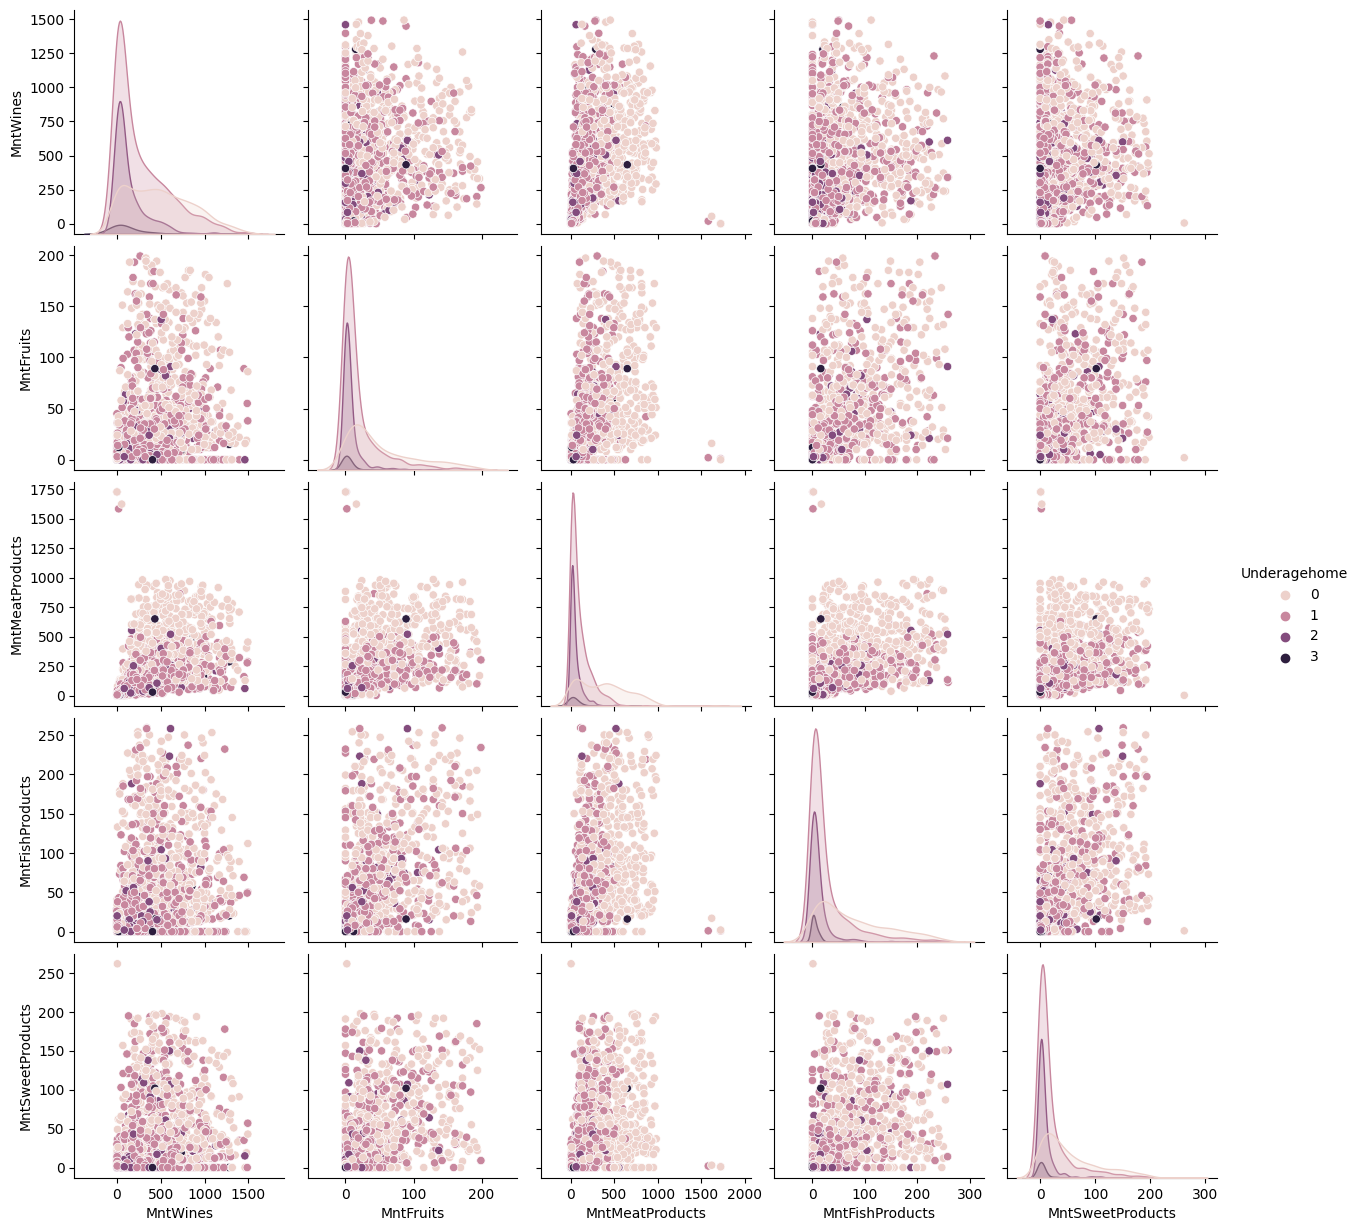

In [47]:
df = pd.read_csv('./data/marketing_campaign.csv', sep='\t')
df = df.dropna()
print(list(df.columns))
df['Income'] = df['Income'].astype(int)
df['Year_Birth'] = df['Year_Birth'].astype(int)
df['Underagehome'] = df['Kidhome'] + df['Teenhome']
df_slice = df[['Underagehome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
print(df_slice.head(3))

sns.pairplot(df_slice, hue='Underagehome')

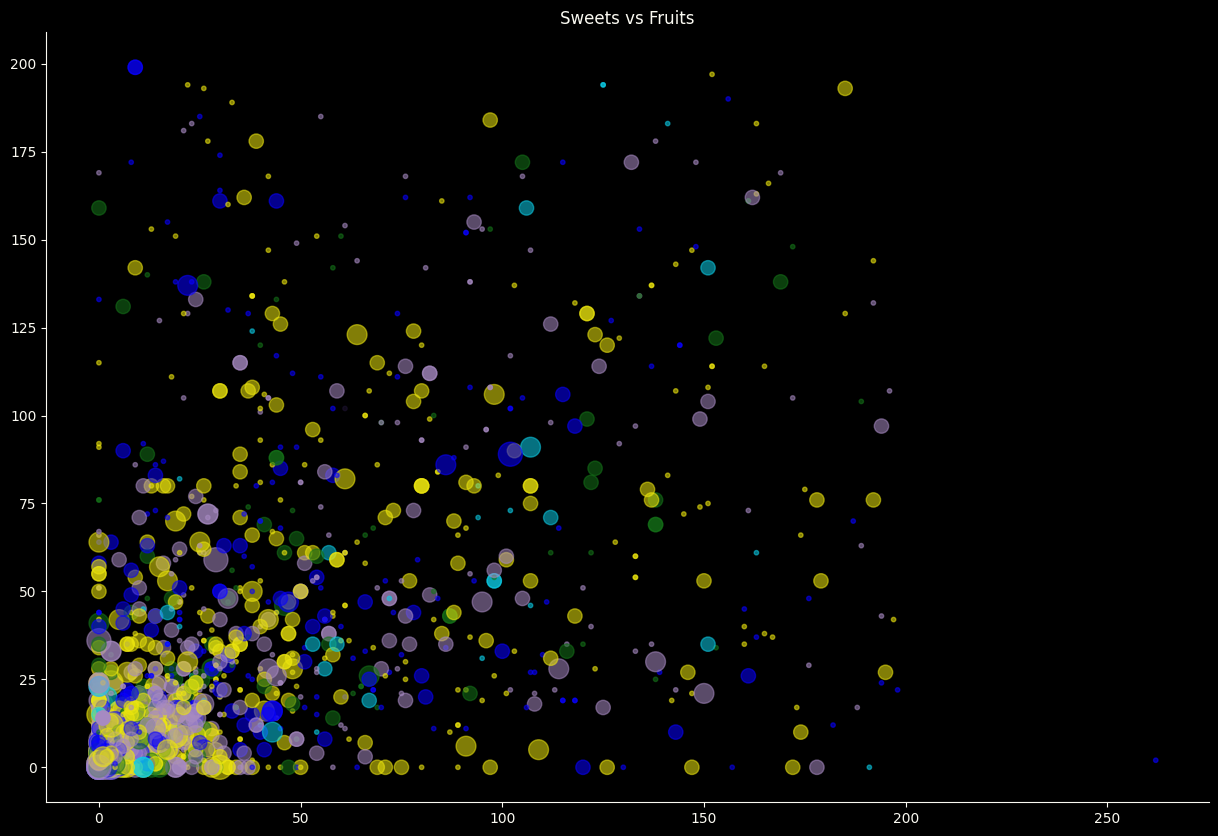

In [66]:
sweets =  df['MntSweetProducts'].values
fruits = df['MntFruits'].values

children = df['Underagehome'].values
def scale(x, lower=0, upper=1):
  return ((x - np.min(x)) / (np.max(x) - np.min(x))) * (upper - lower)  + lower
children = scale(children, 10, 300)

income = df['Income'].values
income = scale(income, 0.5, 1)

# df['Marital_Status'].unique() 
status = df['Marital_Status'].values # ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']
def f(x):
    match x:
        case 'Single':
            return '#0800ff' # BRIGHTBLUE
        case 'Together':
            return '#a78ac2' # LILIAC
        case 'Married':
            return '#ede60e' # YELLOW
        case 'Divorced':
            return '#157319' # EMERALD
        case 'Widow':
            return '#0ccee8' # LIGHTBLUE
        case 'Alone':
            return '#c41ac4' # MAGENTA
        case _:
            return '#1d1330' # DARKBLUE
status = list(map(f, status))
# print(status[51])

mpl.rcParams['text.color'] = '#FAF9F1'
mpl.rcParams['axes.labelcolor'] = '#FAF9F1'
mpl.rcParams['xtick.color'] = '#FAF9F1'
mpl.rcParams['ytick.color'] = '#FAF9F1'
mpl.rcParams['axes.edgecolor'] = '#FAF9F1'
fig, ax = plt.subplots(figsize=(15, 10))
fig.set_facecolor('k')
ax.set_facecolor('k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.scatter(sweets, fruits, s=children, c=status, alpha=income)
plt.title('Sweets vs Fruits')
plt.show()